In [1]:
import numpy as np
%matplotlib notebook 
import matplotlib.pyplot as plt
try:
    import csiborgtools
except ModuleNotFoundError:
    print("not found")
    import sys
    sys.path.append("../")
    import csiborgtools
import utils
import joblib

from os.path import join
%load_ext autoreload
%autoreload 2
from gc import collect

not found


In [2]:
surv = utils.SDSS()()

X = np.vstack([surv[p] for p in ("DIST", "RA", "DEC")]).T
X = X.astype(np.float32)

../csiborgtools/read/readobs.py:368: UserWarning: Key `IN_DR7_LSS` found in both `routine_keys` and `fits_keys`. Returning `routine_keys` value.
  warn("Key `{}` found in both `routine_keys` and `fits_keys`. "
../csiborgtools/read/readobs.py:375: UserWarning: Returning a FITS property. Be careful about little h!
  warn("Returning a FITS property. Be careful about little h!",


In [3]:
particles = np.load("/mnt/extraspace/rstiskalek/csiborg/scratch/particles.npy")

In [4]:
grid = 256
length = 677.05
paths = csiborgtools.read.Paths()
paths.set_info(7444, paths.get_maximum_snapshot(7444))
box = csiborgtools.units.CSiBORGBox(paths)
MAS = "CIC"
field = csiborgtools.field.DensityField(particles, length, box, MAS)

In [27]:
x0 = field.potential_field(grid, 2)


Using CIC mass assignment scheme with weights
Time taken = 13.839 seconds

Calculating potential from the overdensity..


In [28]:
x1 = field.potential_fieldal_field(grid)


Using CIC mass assignment scheme with weights
Time taken = 13.866 seconds

Calculating potential from the overdensity..


<IPython.core.display.Javascript object>


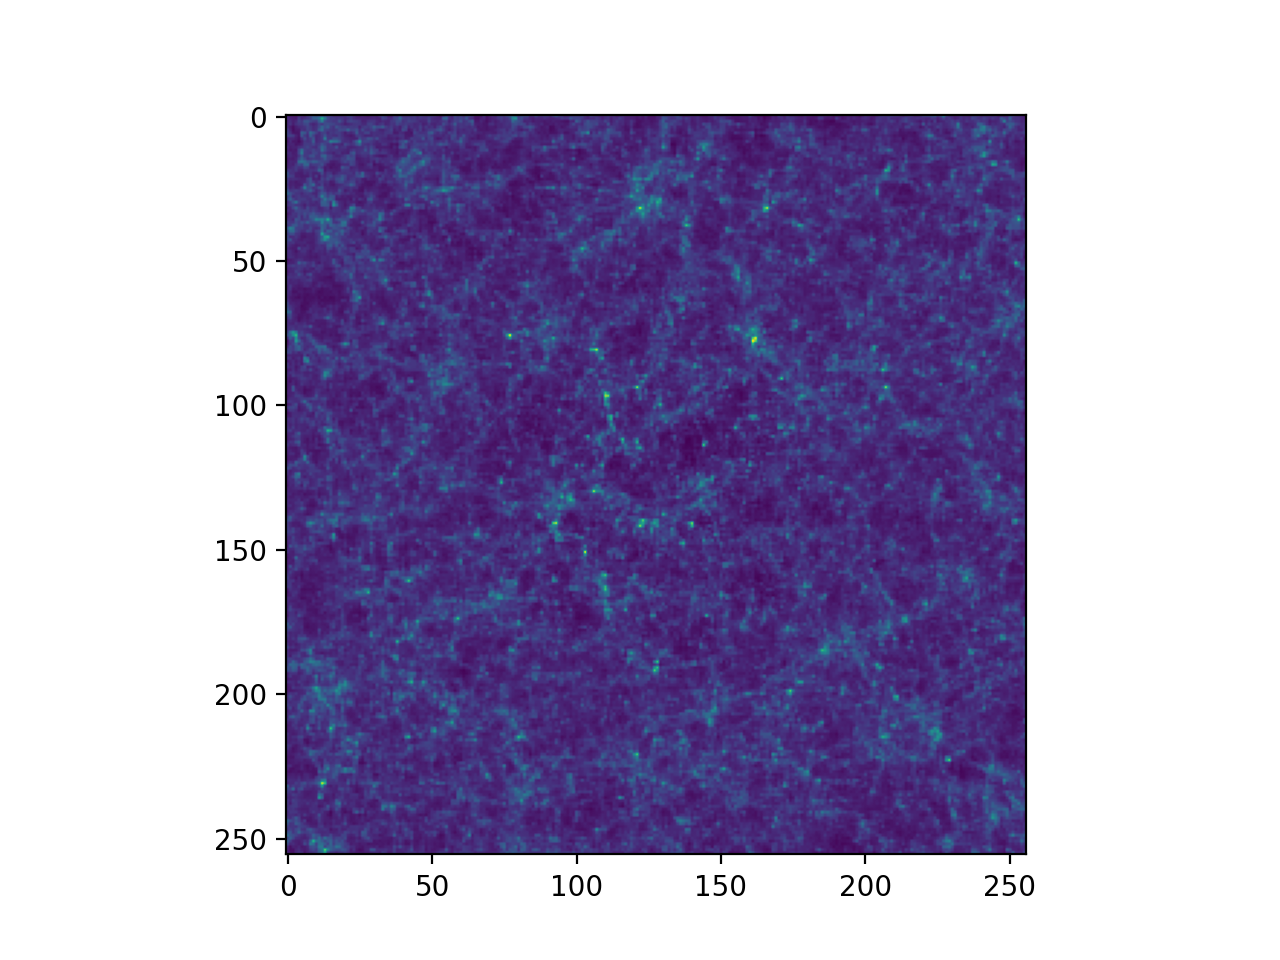

In [34]:
plt.figure()
plt.imshow(np.mean(x0, axis=2) - np.mean(x1, axis=2))
plt.show()

<IPython.core.display.Javascript object>


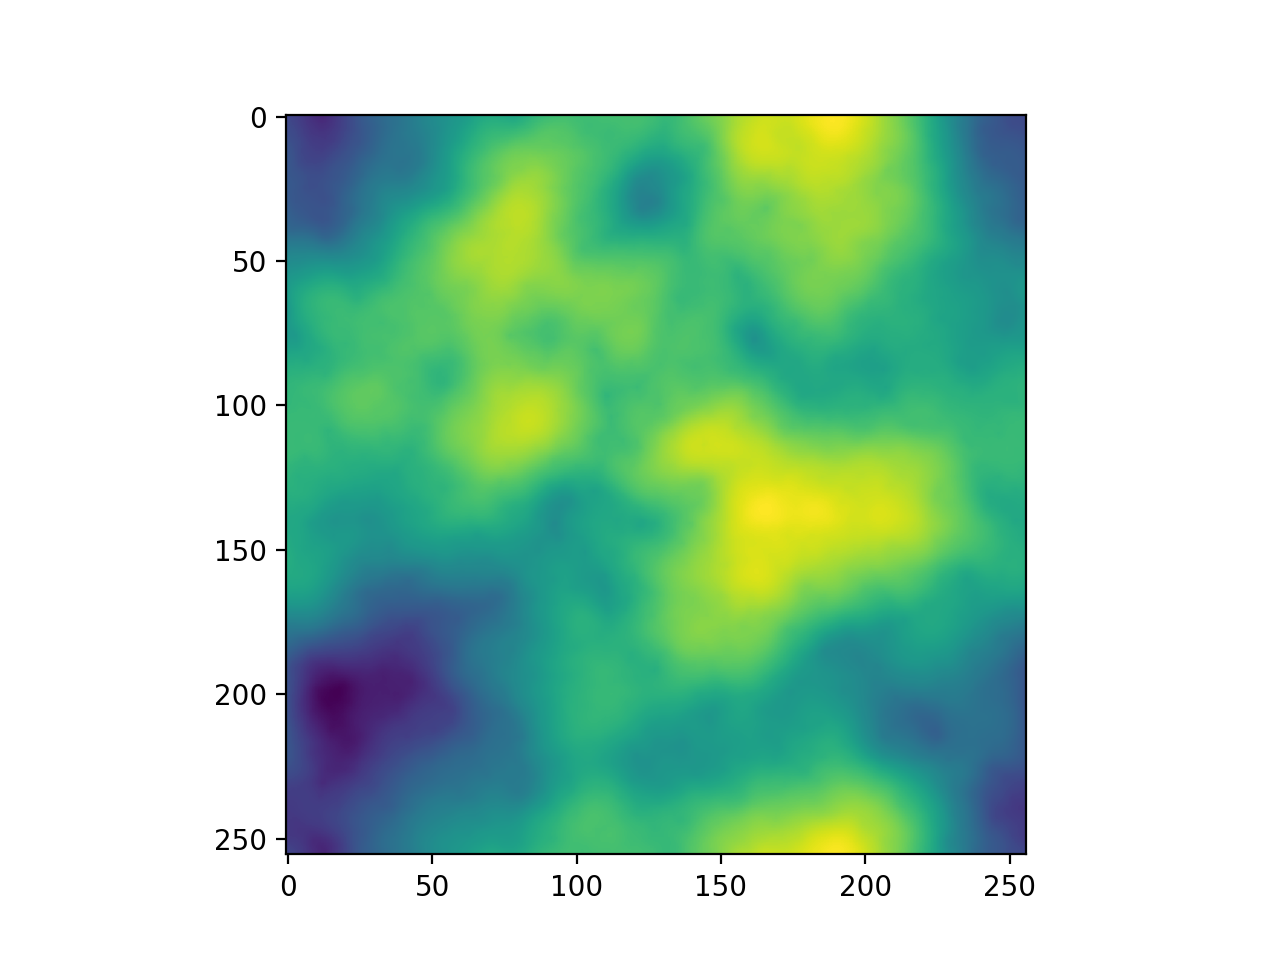

In [33]:
plt.figure()
plt.imshow(np.mean(x1, axis=2))
plt.show()

In [ ]:
delta = field.overdensity_field(grid, verbose=True)

In [ ]:
field.evaluate_sky(delta, pos=X, isdeg=True)

In [ ]:
dtype = {"names": ['x', 'y'], "formats": [float, float]}

In [ ]:
z = np.zeros((2, 2), dtype=dtype)

In [ ]:
z['x']

In [ ]:
T = field.tensor_field(grid)

In [ ]:
Teval = field.evaluate_sky(T.T00, T.T01, T.T02, T.T11, T.T12, T.T22, pos=X, isdeg=True)

In [ ]:
field.tensor_field_eigvals(*Teval)

In [ ]:
np.sort()

In [ ]:
Teval[0].shape

In [ ]:
a

In [ ]:
Z = np.zeros((N, 3, 3), dtype=np.float32)

Z[:, 0, 0] = Teval[0]
Z[:, 0, 1] = Teval[1]
Z[:, 0, 2] = Teval[2]
Z[:, 1, 1] = Teval[3]
Z[:, 1, 2] = Teval[4]
Z[:, 2, 2] = Teval[5]


Zall = np.zeros((N, 3, 3), dtype=np.float32)

Zall[:, 0, 0] = Teval[0]
Zall[:, 0, 1] = Teval[1]
Zall[:, 1, 0] = Teval[1]
Zall[:, 0, 2] = Teval[2]
Zall[:, 2, 0] = Teval[2]
Zall[:, 1, 1] = Teval[3]
Zall[:, 1, 2] = Teval[4]
Zall[:, 2, 1] = Teval[4]
Zall[:, 2, 2] = Teval[5]


In [ ]:
np.linalg.eigvalsh(Z[120, ...], 'U')

In [ ]:
np.linalg.eigvals(Zall[120, ...])

In [ ]:
out = field.evaluate_sky(g.gx, g.gy, g.gz, pos=X)

In [ ]:
out

In [ ]:
plt.figure()
plt.hist(np.log10(np.linalg.norm(out, axis=0)), bins="auto")
plt.show()